# DATA 4319: Statistical and Machine Learning
Much of the content in this lecture is also available from the online companion to a course on machine learning offered at [Caltech](https://work.caltech.edu/telecourse)

## Lecture 1: History, Formalization, and the Perceptron


Machine learning is about making computers modify or adapt their actions so that these actions get more accurate, where accuracy is measured by how well the chosen actions reflect the correct one. In recent years, machine learning has seen an explosion of interest from both academia and industry, though it should be noted that the concept of machine learning has been around since the 1950's. 


![Nvidia Machine Learning Historical Chart](nvidia_picture.png)


### The Components of Learning (by example)
Banks recieve thousands of credit car applications every day; and so, automation is desired. Further, **no magic formula** exists which can always predict whether or not a costumer will default. This lack of magic formula (it really cannot ever be known) implies that we use historical records (DATA) of previous customers to estimate a *good* formula for credit approval. For this machine learning problem, we will have the following components. 

* $x$: Input customer information that is used to make credit decision.
* $f:\mathcal{X} \rightarrow \mathcal{Y}$: *Unknown target* function that is the ideal formula for credit approval. 
* $\mathcal{X}$: *Input space* consisting of all possible input $x$.
* $\mathcal{Y}$: *Output space* consisting of no or yes credit approval.
* $\mathcal{D}$: *Data set* of input-output examples of the form $(x_1, y_1), \dots, (x_N, y_N)$, where $f(x_i) = y_i$ for all $i=1,\dots, N$.
* $\mathcal{A}$: Learning algorithm which uses $D$ to pick a formula (hypothesis) $g:\mathcal{X}\rightarrow \mathcal{Y}$ so that $g\approx f$, where $g\in \mathcal{H}$. Here $\mathcal{H}$ is the *hypothesis space*. 

The following image illustrates the interaction between these components.

![Basic Learning Problem Setup](Learning_Model_One.png)


**Definition.** The hypothesis set and the learning algorithm are called the *learning model*. 

## A Simple Learning Model: The Perceptron 
Let $\mathcal{X} = \mathbb{R}^d$ be the input space, and let $\mathcal{Y} = \{-1, 1\}$ be the output space. For our credit example:

$$
x = (\text{salary, years in residence, outstanding debt,}\dots, \text{other related data})
$$

$$
y = \text{approving or denying credit}
$$

For $h \in \mathcal{H}$, $h(x)$ gives different weights to the different coordinates of $x$. This reflects the relative importance of each coordinate to the credit decision. The combined weighted coordinates form a credit score which is compared to some threshold, say $theta$. 

* Approve if
$$
\sum_{i=1}^{d}w_ix_i > \theta
$$

* Deny if
$$
\sum_{i=1}^{d}w_ix_i < \theta
$$

We next introduce a *bias* $- b = \theta$, and so, we build the following form for hypothesis functions in $\mathcal{H}$.

$$
g(x) = \text{sign}\Big((\sum_{i=1}^{d}w_ix_i) + b\Big), 
$$

where $g(x) = 1$ means approve and $g(x) = -1 $ means deny. 

We next simplify notation by treating the bias $b$ as a weight, and modify $x$ so that 

$$
w = [b, w_1, \dots, w_d]^{T}
$$

$$
x = [1.0, x_1, \dots, x_d]^{T}
$$

Thus, $\mathcal{X} = {1.0}\times\mathbb{R}^d$, and $g(x) = \text{sign}(w^{T}x)$. 

### Perceptron Learning Algorithm (PLA)
This is an iterative method. Suppose an example from $(x_1,y_1), \dots, (x_N, y_N)$ is currently misclassifed at time $t$, and denote this misclassifed example by $(x(t), y(t))$. Note that since $(x(t), y(t))$ is currently misclassifed, 

$$
y(t) \neq \text{sign}(w^{T}(t)x(t)). 
$$

**Update Rule:**

$$
w(t+1) = w(t) + y(t)x(t).
$$

**Theorem.** The perceptron model will always classify the training examples correctly when the data is linearly seperable. 

## Julia Programming: The Perceptron Learning Model (Classical Version)
We will now use the Julia programming language to implement the perceptron learning model. We will classify data from the [iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set). Our task is to predict the species of flower based off of measurements of sepeal length and width. This task is often referred to as the ''Hello World'' of machine learning.

You will need to add the following packages:
 * RDatasets [documentation](https://github.com/JuliaStats/RDatasets.jl)
 * Plots [documentation](http://docs.juliaplots.org/latest/)
 
 
---

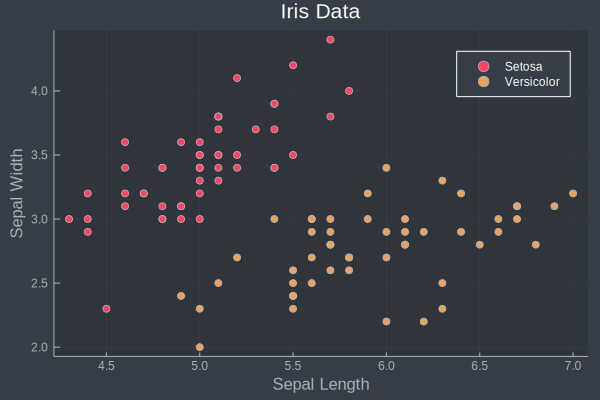

In [1]:
using RDatasets
using Plots
theme(:dark)

iris = dataset("datasets", "iris")
X_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]
Y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]

scatter(X_data[1:50], 
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data")

scatter!(X_data[51:100],
        label = "Versicolor")

---

Notice that our data is linearly separable. This is very important since a single perceptron can only be used to implement linearly separable functions. More specifically, a single perceptron will learn a linear seperator that partitions the data set above into two distinct groups. That is, we seek a line

$$
y = mx + b,
$$

where all data points above $y$ belong to one class of data, and all data points below $y$ belong to the other class of data points. 


---

In [2]:
# Perceptron Activation Function 
function g(weights, x)
    x_new = [1.0, x[1], x[2]]
    return weights'x_new > 0 ? 1 : -1
end

# Perceptron Update Rule
function perceptron_update(weights, x, y)
    if g(weights, x) != y
        weights += y*[1.0, x[1], x[2]]
    end
    return weights
end

# Error Count
function error(weights, X, Y)
    return sum([Int(g(weights, X[i]) != Y[i]) for i = 1:length(X)])
end;

In [3]:
# Iterate the perceptron update rule by randomly testing entries in the dataset. This 
# is equivalent to what we will learn to be stochastic gradient descent.
function perceptron_learning_algorithm(X, Y; epochs = 100000)
    # Assign random weights
    w = randn(3)

    # Save the error measures
    error_points = [(0.0, error(w, X, Y))]
    
    # A simple counter
    i = 1
    
    while error(w, X, Y) > 0 && i < epochs
        # Choose random entries to update (if possible)
        #j = rand(1:100)
        for j = 1:length(X)
            w = perceptron_update(w, X[j], Y[j])
        end
        push!(error_points, (i, error(w, X, Y)))
        i += 1
    end
    return w, error_points
end;

---

For our 2-dimensional data set the perceptron will learn weights that define the following 3-dimensional hyperplane:

$$
x_3 = w_1x_1 + w_2x_2 + w_3
$$

Setting $x_3 = 0$ and solving for $x_2$, we get the following line in 2-dimensional space:

$$
x_2 = -\frac{w_2}{w_3}x_1 - \frac{w_1}{w_3}.
$$

Plotting this line on the iris scatter plot will show that our data has been split into two distinct groups. The following code cell shows this. 

---

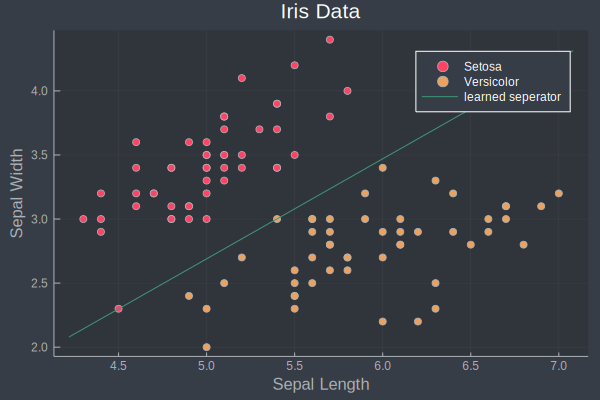

In [4]:
# Test your functions
w, error_points = perceptron_learning_algorithm(X_data, Y_data)

# Plot your learned function
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "learned seperator")

---

Using the error points define above, we can also visualize how the number of missclassifications decrease with each epoch of the perceptron algorithm. 

---

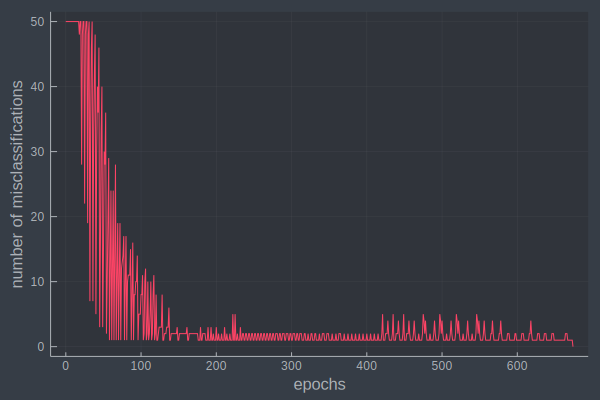

In [6]:
plot(error_points, 
    xaxis = "epochs", 
    yaxis = "number of misclassifications",
    legend = false)

---

# Conclusion

In this notebook we introduced the components of learning as well as the perceptron learning algorithm. We also used the perceptron learning algorithm to classify flower species in the iris data set according to measurments of sepal length and sepal width. 

---